<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>K-Means Clustering</center>

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered the one of the simplest model among them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression


In this notebook we practice k-means clustering with 2 examples:
- k-means on a random generated dataset
- Using k-means for customer segmentation

### Import libraries
Lets first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.

In [37]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

# k-Means on a randomly generated dataset
Lets create our own dataset for this lab!


First we need to set up a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>

In [91]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [11]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display the scatter plot of the randomly generated data.

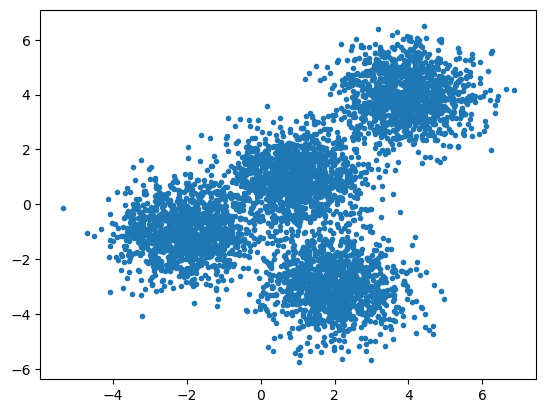

In [14]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

## Setting up K-Means
Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n\_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n\_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n\_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [18]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>

In [89]:
k_means = KMeans(n_clusters=4, n_init=12)
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b> 

In [24]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster&#95;centers&#95; </b> and save it as <b> k_means_cluster_centers </b>

In [27]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

## Creating the Visual Plot
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

Please read through the code and comments to understand how to plot the model.

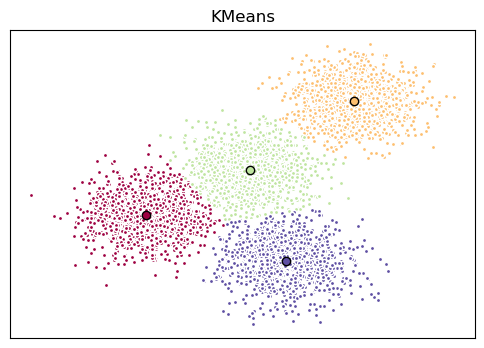

In [31]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Practice
Try to cluster the above dataset into 3 clusters.  
Notice: do not generate data again, use the same dataset as above.

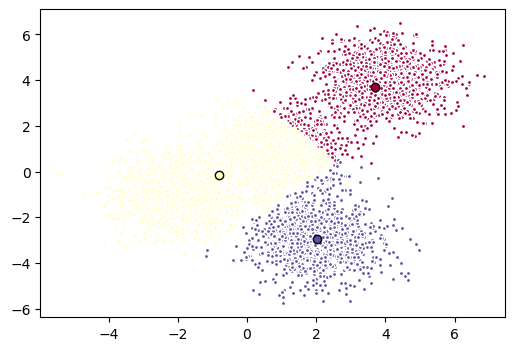

In [33]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


Double-click __here__ for the solution.

<!-- Your answer is below:

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


-->

# Customer Segmentation with K-Means
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

Lets download the dataset. To download the data, we will use **`!wget`**. To download the data, we will use `!wget` to download it from IBM Object Storage.  
__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)

In [ ]:
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")

### Load Data From CSV File  
Before you can work with the data, you must use the URL to get the Cust_Segmentation.csv.

In [1]:
import pandas as pd
cust_df = pd.read_csv("./healthcare-dataset-stroke-data.csv")
cust_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Pre-processing

As you can see, __Address__ in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [43]:
df = cust_df.drop('Residence_type', axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __tandardScaler()__ to normalize our dataset.

In [49]:
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols].values

# Substituir valores NaN 
X = np.nan_to_num(X)

Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet    

array([[-1.29831203,  1.05143428, -0.32860186, ...,  2.70637544,
         0.92807976,  4.41838074],
       [ 0.71637149,  0.78607007, -0.32860186, ...,  2.12155854,
        -2.91300238,  4.41838074],
       [-0.25547819,  1.62639008, -0.32860186, ..., -0.0050283 ,
         0.4977946 ,  4.41838074],
       ...,
       [-0.79371959, -0.36384151, -0.32860186, ..., -0.51144264,
         0.29839416, -0.22632726],
       [ 0.04849658,  0.34379639, -0.32860186, ...,  1.32825706,
        -0.22634384, -0.22632726],
       [ 0.38569496,  0.03420481, -0.32860186, ..., -0.46086746,
        -0.16337528, -0.22632726]])

### Modeling

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.

In [51]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 1 0 ... 2 0 0]


### Insights
We assign the labels to each row in dataframe.

In [53]:
df["Clus_km"] = labels
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Clus_km
0,9046,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1,2
1,51676,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1,2


We can easily check the centroid values by averaging the features in each cluster.

In [63]:
# Filtrar colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular médias apenas para colunas numéricas
cluster_means = df.groupby("Clus_km")[numeric_columns].mean()
cluster_means

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
Clus_km,,,,,,,
0,36189.107546,42.712442,0.101604,0.052882,106.418116,28.762293,0.050505
1,60426.418089,43.600501,0.095563,0.054039,105.899329,29.021727,0.050057
2,11665.786099,43.351276,0.095267,0.055123,106.136561,28.887951,0.045536


Now, lets look at the distribution of customers based on their age and income:

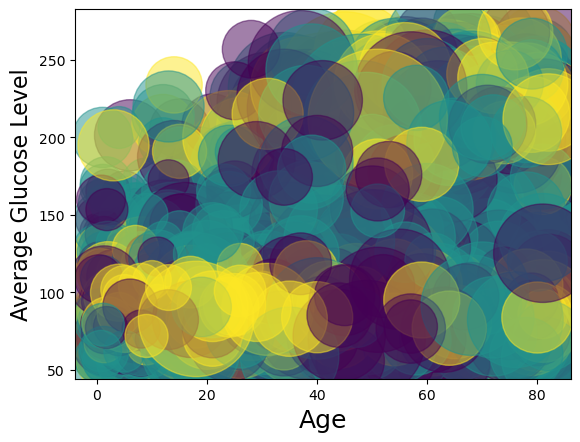

In [69]:
# Definir a área dos pontos com base na coluna 'bmi' 
area = np.pi * (df['bmi'].fillna(df['bmi'].mean()))**2  # Substitui NaN pela média de BMI

# Criar o gráfico de dispersão
plt.scatter(df['age'], df['avg_glucose_level'], s=area, c=labels.astype(float), alpha=0.5)

plt.xlabel('Age', fontsize=18)
plt.ylabel('Average Glucose Level', fontsize=16)

plt.show()

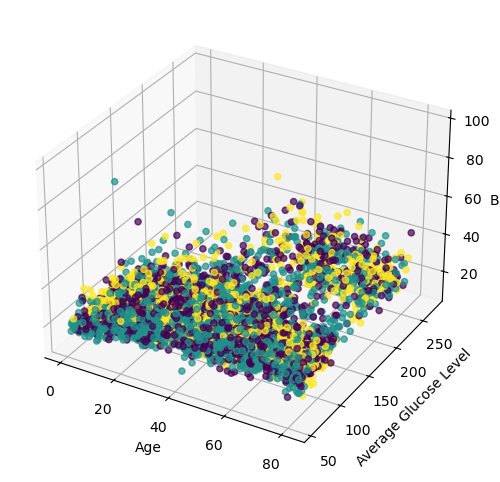

In [85]:
from mpl_toolkits.mplot3d import Axes3D

# Preencher valores ausentes na coluna 'bmi' com a média
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Configurar os rótulos dos eixos
ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')

# Criar o gráfico de dispersão 3D
sc = ax.scatter(df['age'], df['avg_glucose_level'], df['bmi'], c=labels.astype(float), cmap='viridis', alpha=0.7)

plt.show()

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​